In [3]:
# library for feature engineering and EDA
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from datetime import datetime
import random

# library for statistic
from scipy import stats
from scipy.stats import chi2_contingency, kruskal, boxcox, norm, skew, kurtosis
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# library for sampling 
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE, SVMSMOTE

# library for machine learning
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, RocCurveDisplay, confusion_matrix, precision_recall_fscore_support, confusion_matrix, roc_curve
from sklearn.metrics import precision_recall_fscore_support
from sklearn.neural_network import MLPClassifier

%matplotlib inline

c:\Users\jongb\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Data Processing 1 

### 1-1 Data Load 

In [ ]:
!pwd
path = "./"
random_state = 1234

/c/Users/jongb/bank_marketing


In [5]:
df = pd.read_csv(path + "data/bank-additional-full.csv", delimiter=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 1-2 Check Duplicates

In [6]:
print("The number of duplicates :", df.duplicated().sum())

The number of duplicates : 12


In [7]:
# Remove duplicates
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [8]:
# after removing duplicates, reset index
df = df.reset_index(drop=True)
print("The number of duplicates :", df.duplicated().sum())

The number of duplicates : 0


In [9]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 2. EDA

### 2-1 Check data Type and Summary

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [11]:
# Check missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [12]:
# Check categorical and numeric columns
for column_name in list(df.columns):
    print(
        f"column name: {column_name}\ndata type: {df[column_name].dtype}\n{df[column_name].unique()}\n"
    )

column name: age
data type: int64
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

column name: job
data type: object
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

column name: marital
data type: object
['married' 'single' 'divorced' 'unknown']

column name: education
data type: object
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

column name: default
data type: object
['no' 'unknown' 'yes']

column name: housing
data type: object
['no' 'yes' 'unknown']

column name: loan
data type: object
['no' 'yes' 'unknown']

column name: contact
data type: object
['telephone' 'cellular']

column name: month
data type: object
['may' 'jun' 

In [13]:
categorical_columns_list = list(df.select_dtypes(include=["object"]).columns)
numerical_columns_list = list(df.select_dtypes(include=["float64", "int64"]).columns)
target_column = "y"

print(f"total number of column: {len(df.columns)}")
print(f"the number of categorical column: {len(categorical_columns_list)}")
print(f"the number of numerical column: {len(numerical_columns_list)}")

total number of column: 21
the number of categorical column: 11
the number of numerical column: 10


#### Summary of Dataset
##### - Total Number of Variables : 21
    categorical variables : 11 (including target)
    numerical variables : 10 
##### - Total number of observations : 41176
##### - Missing Values : 0 
##### - Duplicated Values : 12

### 2-2 Check Target variable

In [14]:
# Remove target column from categorical column list
categorical_columns_list.remove(target_column)

In [15]:
# Check class distribution
df[target_column].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

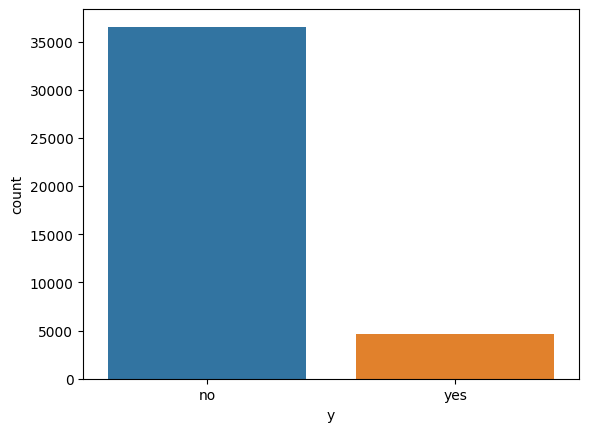

In [16]:
sns.countplot(x=target_column, data=df)

##### Summary of target variable
- binary class is imbalanced, so I`ve decided to apply SMOTEENN which is combined sampling method

### 2-3 Check features

#### 1) Categorical Data Analysis

##### Check significant features 

In [17]:
df[categorical_columns_list].nunique().sort_values()

contact         2
default         3
housing         3
loan            3
poutcome        3
marital         4
day_of_week     5
education       8
month          10
job            12
dtype: int64

##### Check distribution

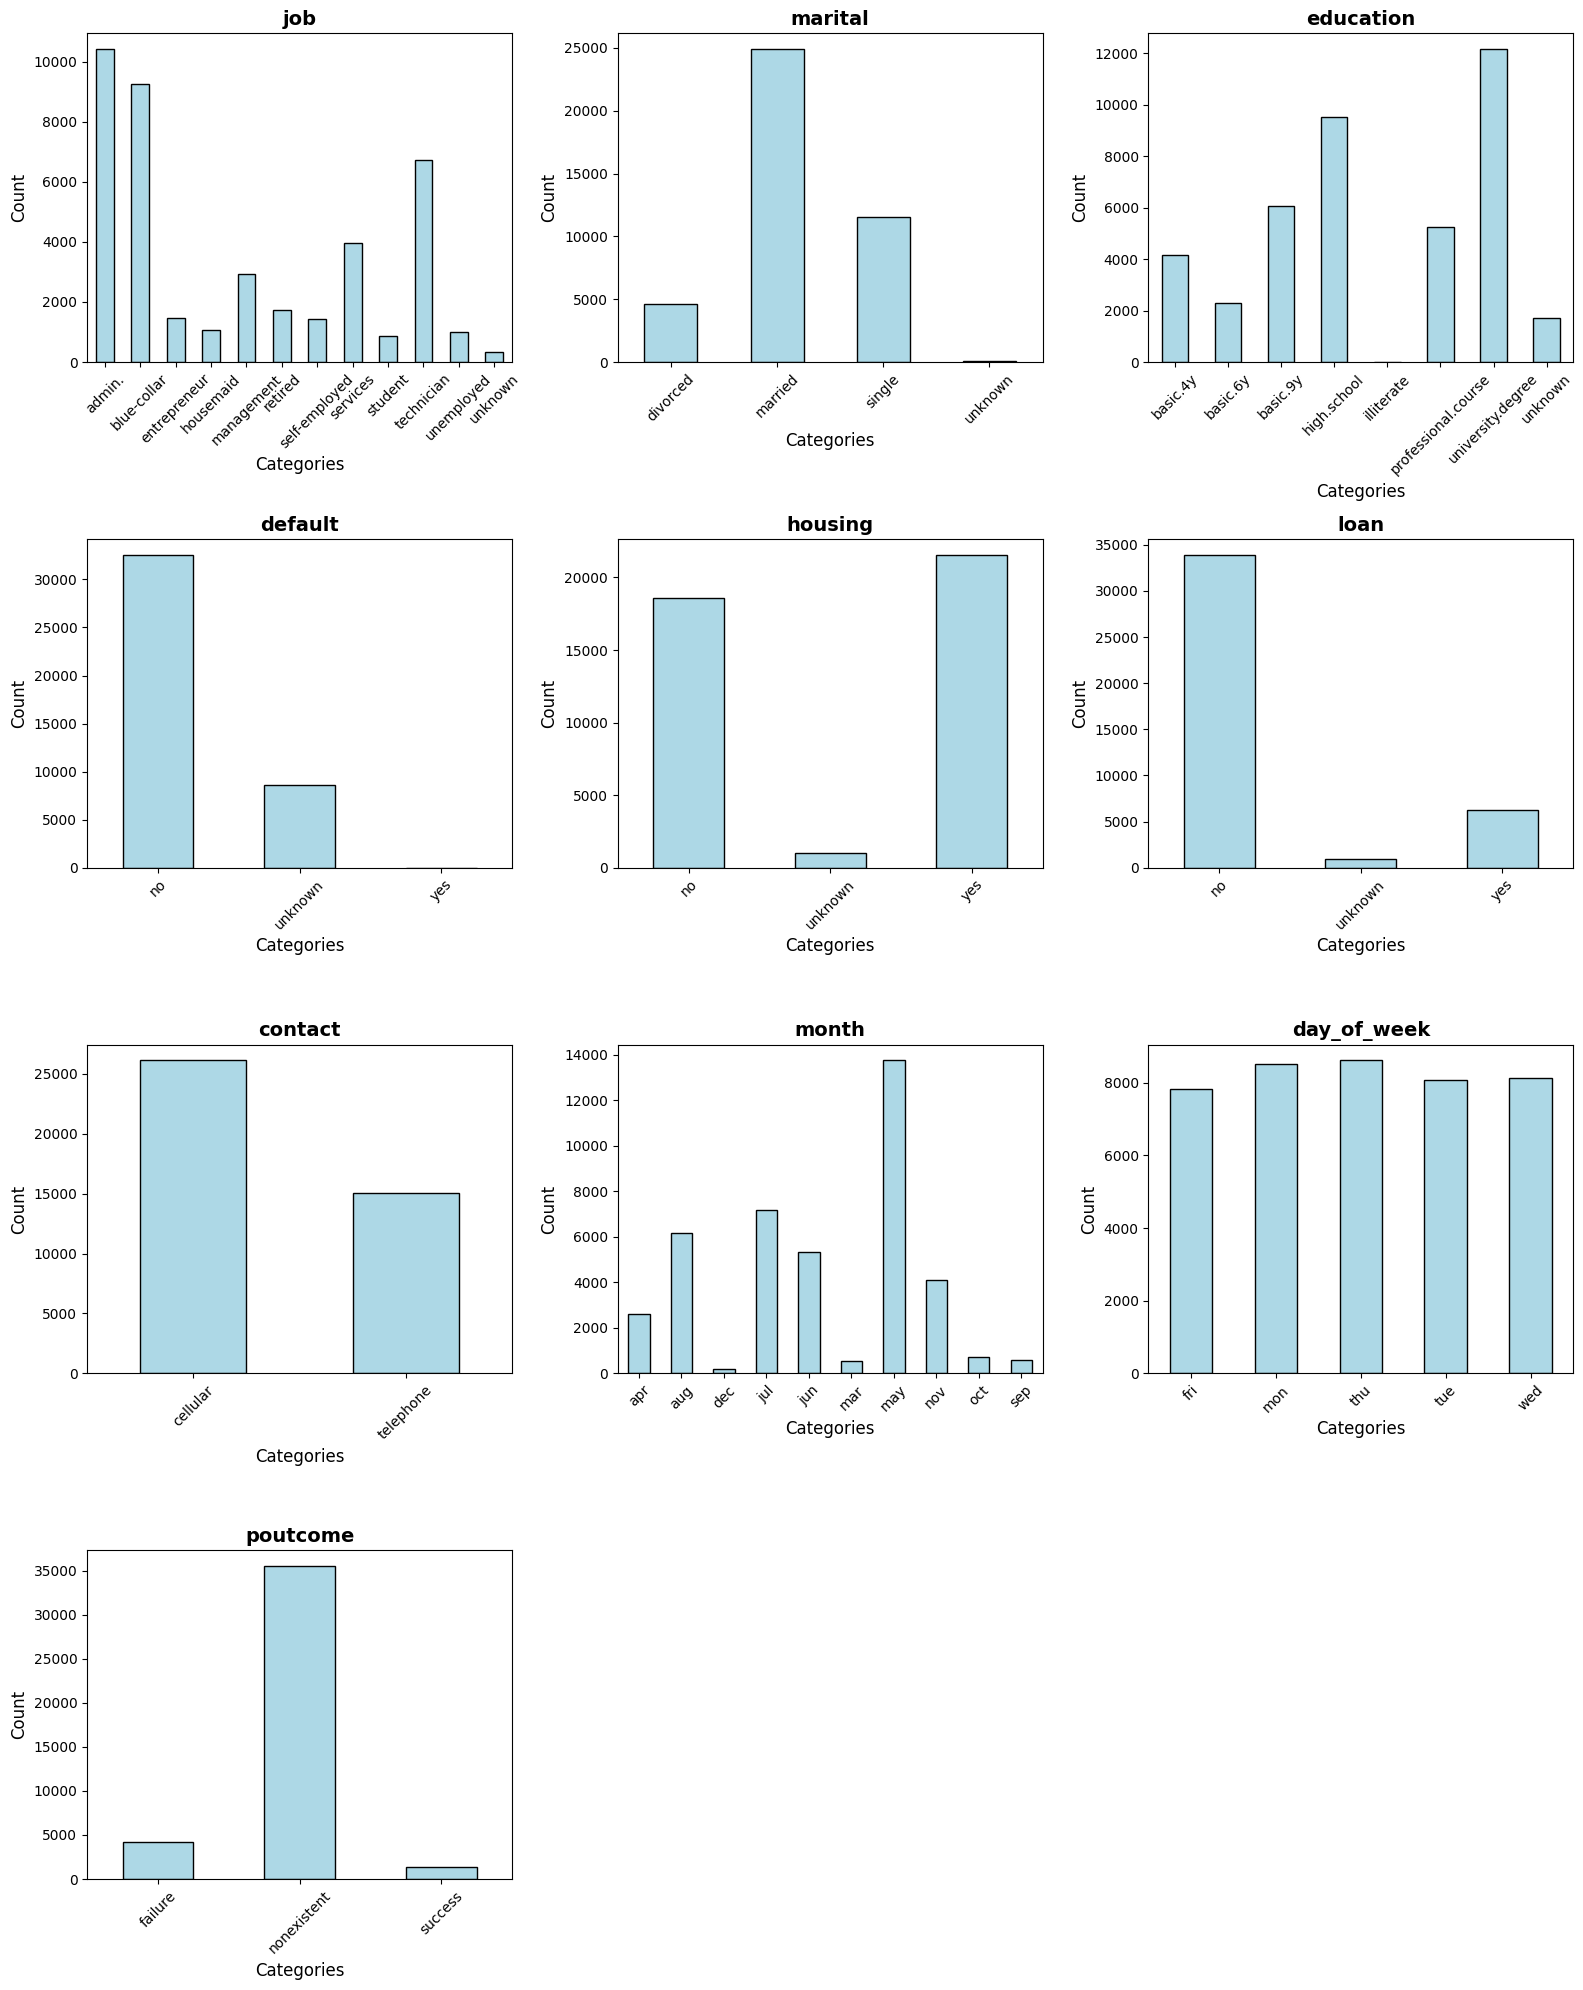

In [18]:
plt.figure(figsize=(16, 20))
x = 1
plt.subplots_adjust(hspace=0.5, wspace=0.4)

for column_name in categorical_columns_list:
    plt.subplot(4, 3, x)
    x += 1
    df[column_name].value_counts().sort_index().plot(
        kind="bar", color="lightblue", edgecolor="black"
    )

    plt.title(column_name, fontsize=14, fontweight="bold")
    plt.xlabel("Categories", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

##### Check correlation between target variable and categorical variables

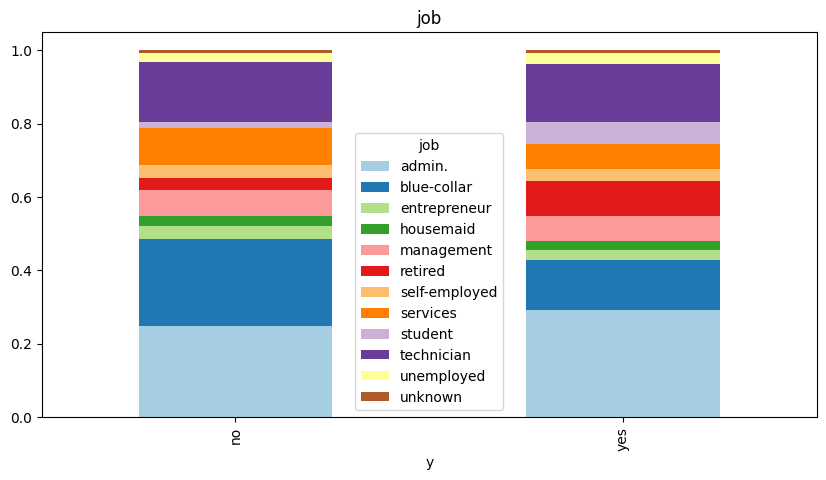

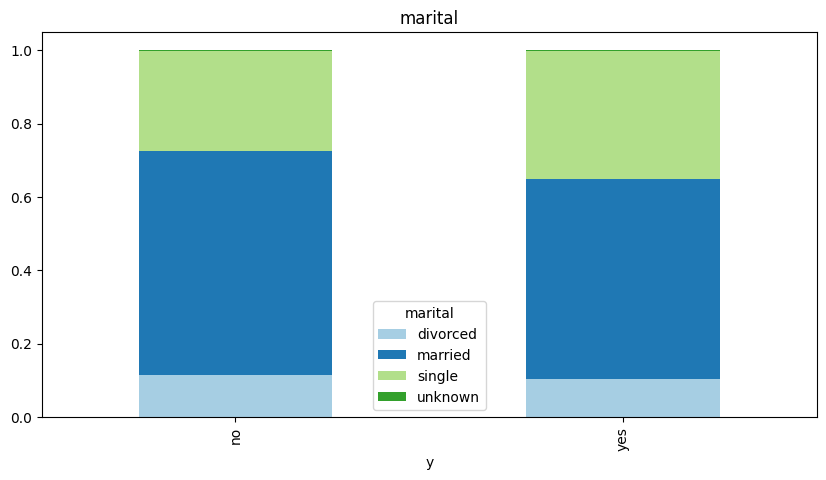

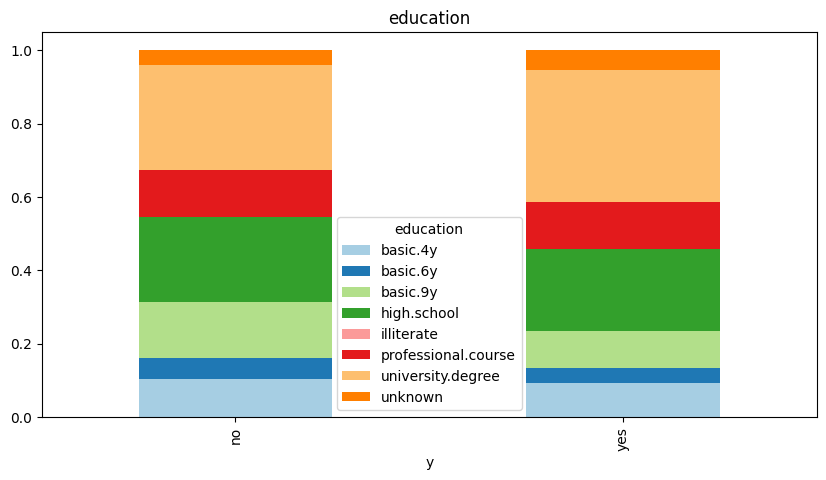

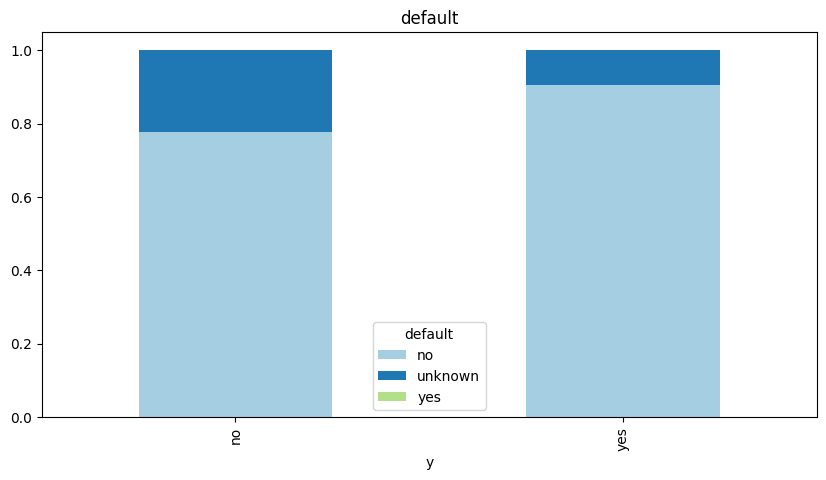

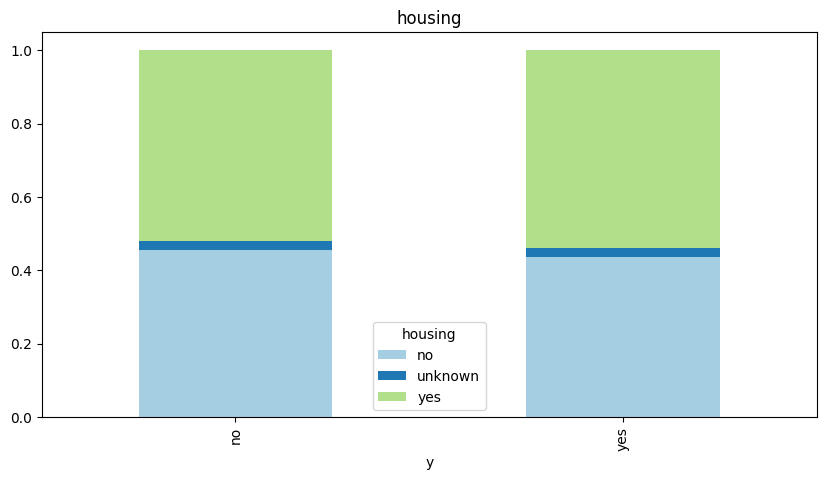

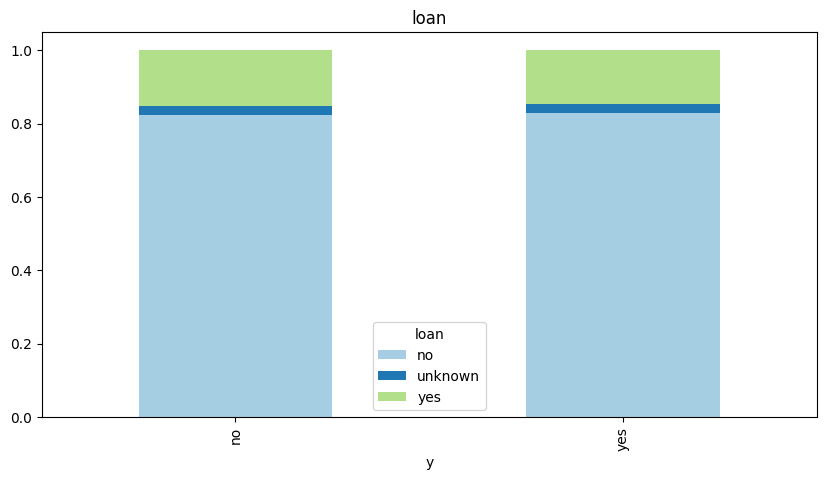

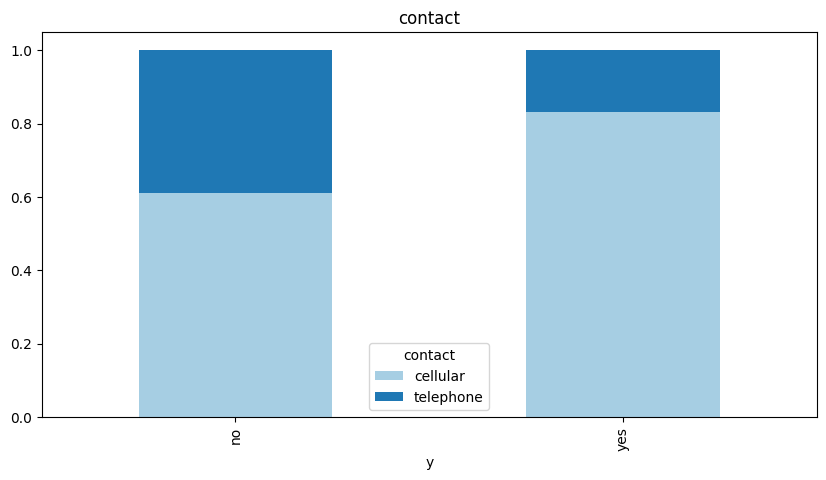

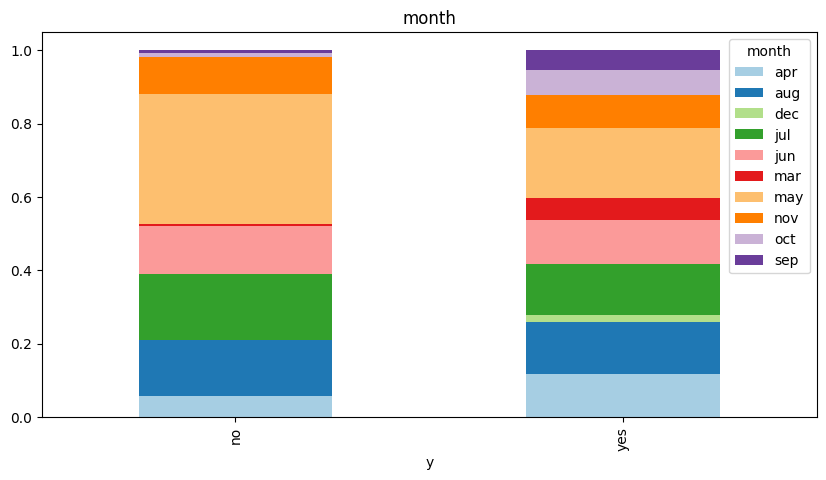

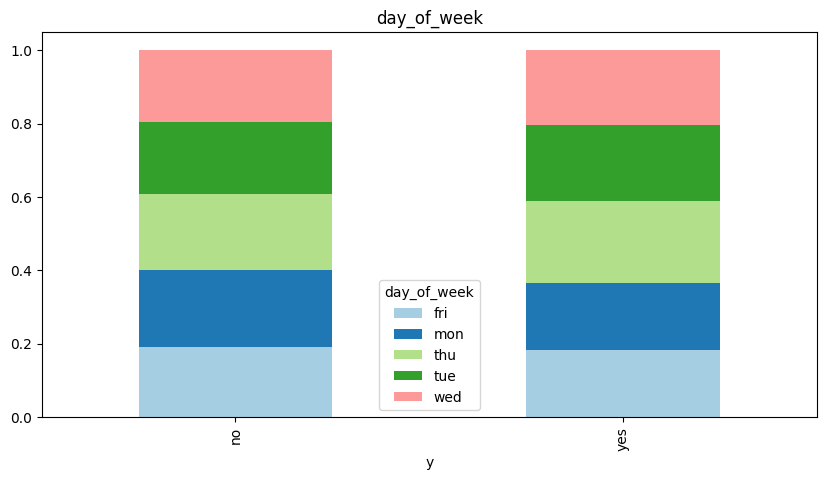

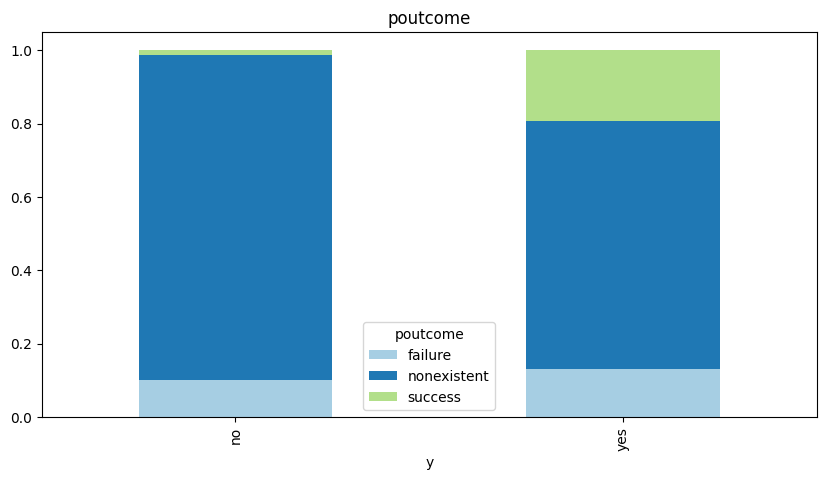

In [19]:
for column_name in categorical_columns_list:

    pd.crosstab(df[target_column], df[column_name], normalize="index").plot.bar(
        stacked=True, figsize=(10, 5), color=plt.cm.Paired.colors
    )
    plt.title(column_name)
plt.show()

##### Chi-Square Test (Chi-Square Test of Independence)
*   Used to determine whether two categorical variables are associated with each other.
*   Examines the relationship between a categorical variable and a target variable.
*   A p-value less than or equal to 0.05 is typically considered statistically significant, leading to the rejection of the null hypothesis. (The p-value threshold may vary, but 0.05 is commonly used.)
  - **Null Hypothesis**: Variables X and Y are independent.
  - **Alternative Hypothesis**: Variables X and Y are not independent.

In [20]:
list_significant_column_by_chi = []
results_list = []
for column_name in categorical_columns_list:
    statistic, pvalue, _, _ = chi2_contingency(
        pd.crosstab(df[target_column], df[column_name])
    )
    is_significant = pvalue < 0.05

    if pvalue <= 0.05:
        list_significant_column_by_chi.append(column_name)
        results_list.append(
            {
                "Feature": column_name,
                "Chi2-statistic": statistic,
                "P-value": pvalue,
                "Significant": is_significant,
            }
        )

results_df = pd.DataFrame(results_list)


def highlight_significant(val):
    color = "background-color: lightgreen" if val else ""
    return color


results_df_styled = results_df.style.applymap(
    highlight_significant, subset=["Significant"]
)


print(f"Total number of catgorical feature: {len(categorical_columns_list)}\n")
print(
    f"Significany columns by chi:\nnumber: {len(list_significant_column_by_chi)}\n{list_significant_column_by_chi}"
)
results_df_styled

Total number of catgorical feature: 10

Significany columns by chi:
number: 8
['job', 'marital', 'education', 'default', 'contact', 'month', 'day_of_week', 'poutcome']


,Feature,Chi2-statistic,P-value,Significant
0,job,961.743804,0.000000,True
1,marital,122.959314,0.000000,True
2,education,192.848505,0.000000,True
3,default,406.556094,0.000000,True
4,contact,862.080737,0.000000,True
5,month,3103.032672,0.000000,True
6,day_of_week,26.054244,0.000031,True
7,poutcome,4230.143428,0.000000,True


##### Insight
1. Out of 10 categorical variables, only 8 show a significant relationship with the target variable.  
2. Variables `housing` and `loan` are determined to have no significant correlation with the target variable `y`.  
3. Categorical variables with significant relationships will be selected as features for future machine learning training.  



#### 2) Check Numerical features

##### Check significant numerical features

In [21]:
df[numerical_columns_list].nunique().sort_values()

previous             8
emp.var.rate        10
nr.employed         11
cons.price.idx      26
cons.conf.idx       26
pdays               27
campaign            42
age                 78
euribor3m          316
duration          1544
dtype: int64

In [22]:
df[numerical_columns_list].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


##### Check distribution

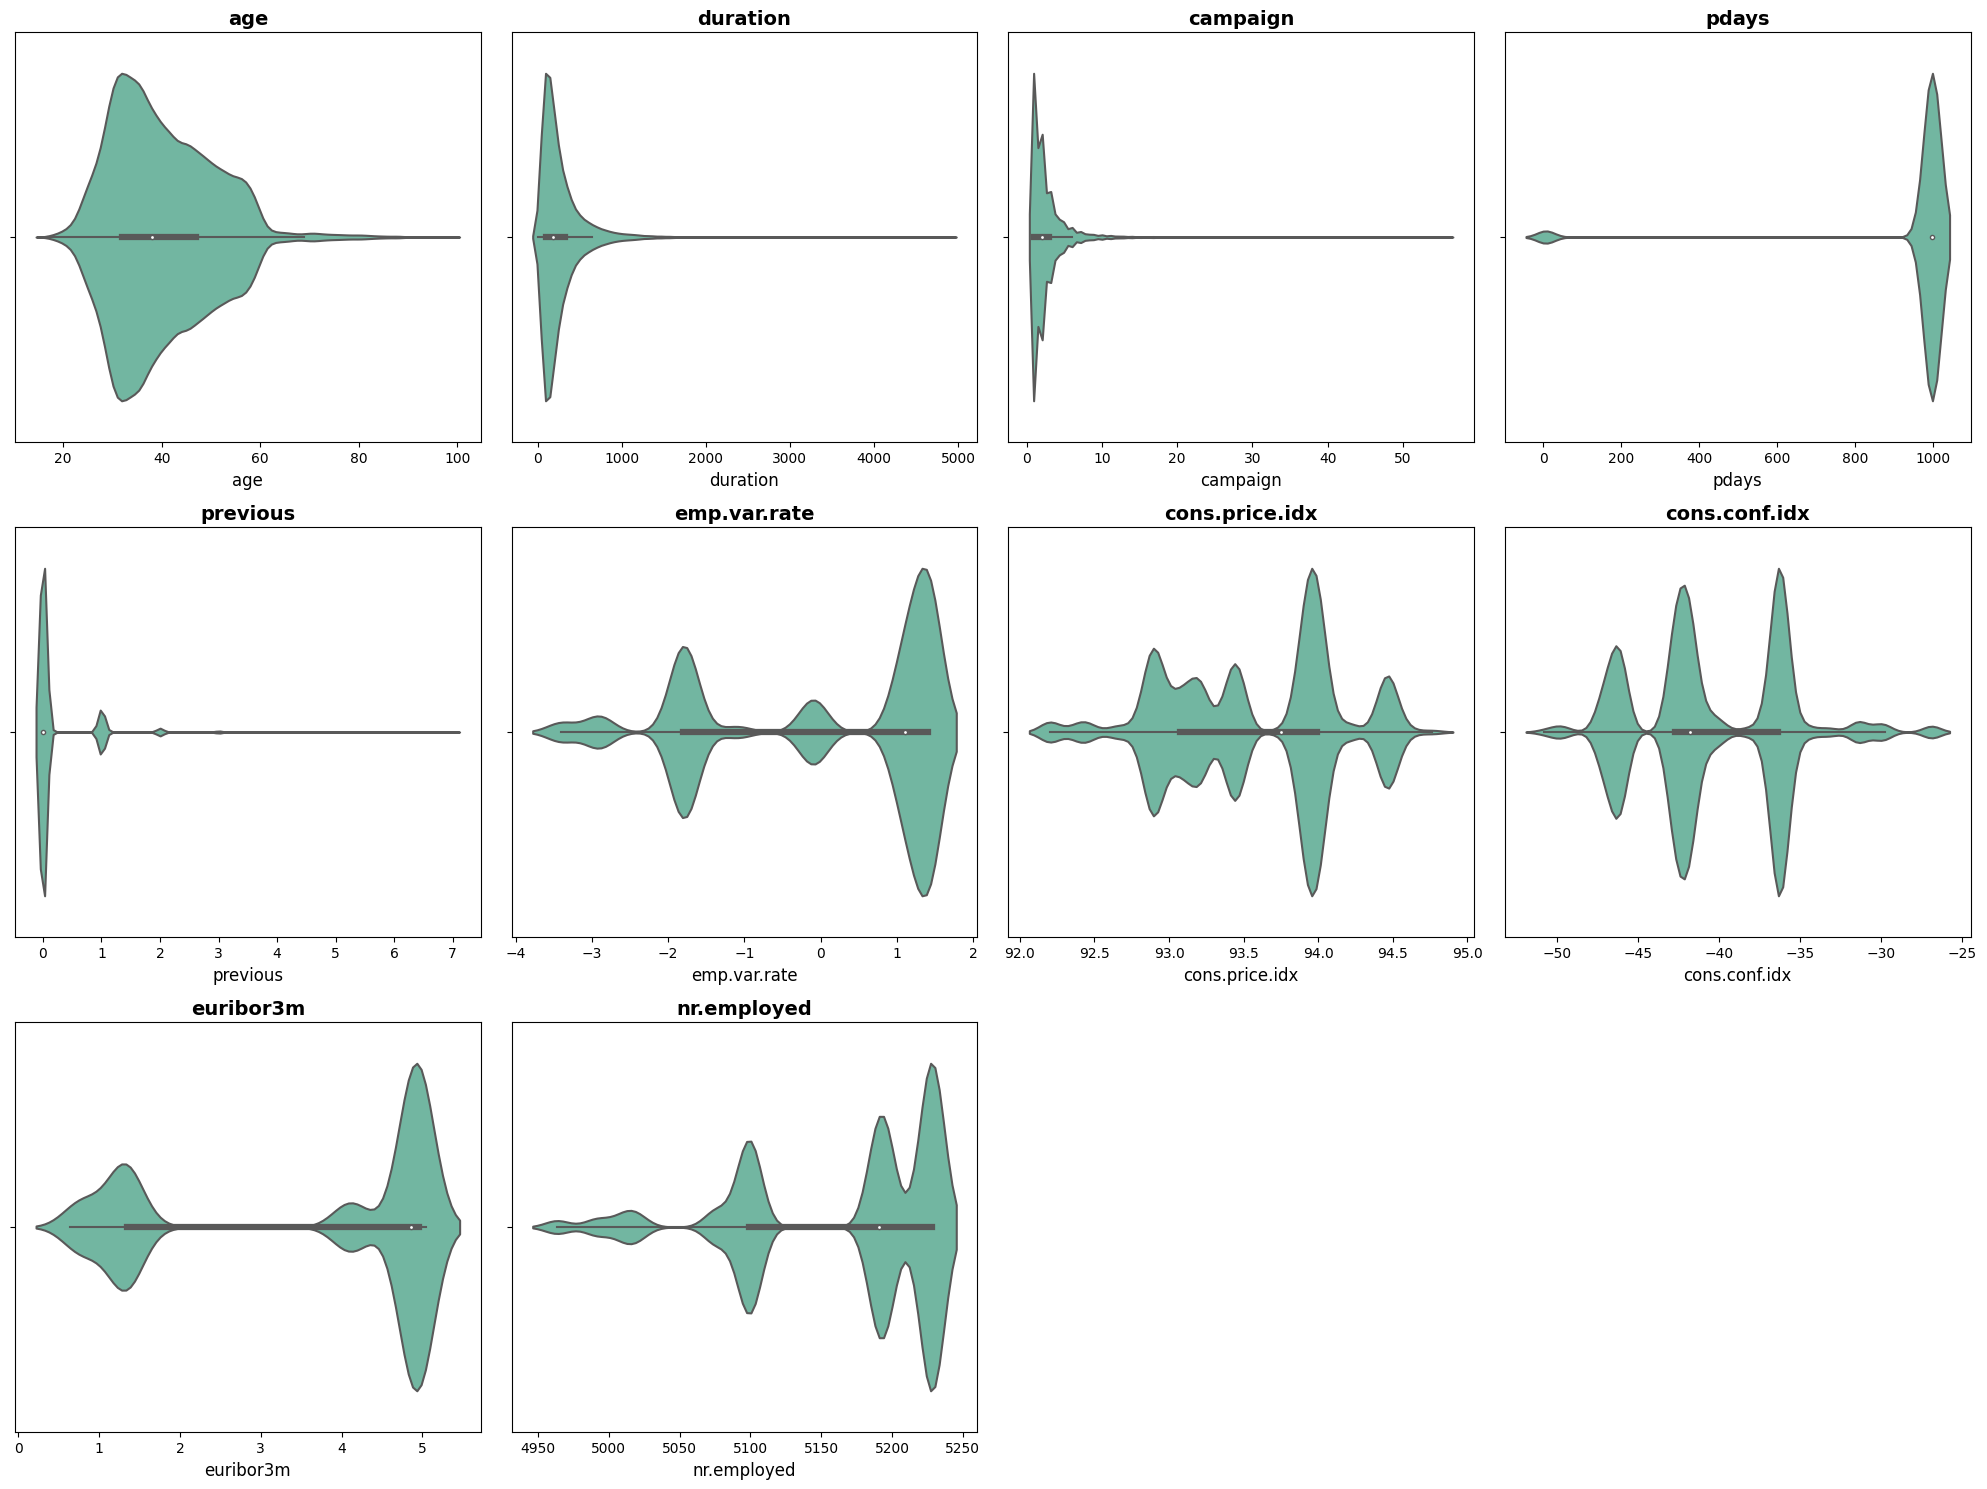

In [23]:
plt.figure(figsize=(20, 15))
x = 1
plt.subplots_adjust(top=0.95, bottom=0.05, hspace=0.4, wspace=0.4)


for column_name in numerical_columns_list:
    plt.subplot(3, 4, x)
    x += 1
    sns.violinplot(x=column_name, data=df, palette="Set2")

    plt.title(column_name, fontsize=14, fontweight="bold")
    plt.xlabel(column_name, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

In [24]:
for column_name in numerical_columns_list:
    print(
        column_name,
        "skew : ",
        skew(df[column_name]),
        "kur : ",
        kurtosis(df[column_name]),
    )

age skew :  0.7845316793906337 kur :  0.7908715485573286
duration skew :  3.2626886475171046 kur :  20.241167105999835
campaign skew :  4.76187058291751 kur :  36.96722235388976
pdays skew :  -4.921207099141221 kur :  22.21870880664178
previous skew :  3.8312559388497256 kur :  20.09957712427588
emp.var.rate skew :  -0.7240342146771608 kur :  -1.062714697365619
cons.price.idx skew :  -0.2308444969439891 kur :  -0.8298960161833482
cons.conf.idx skew :  0.3028649665515025 kur :  -0.3591991612497849
euribor3m skew :  -0.7091683770703301 kur :  -1.4067662115952242
nr.employed skew :  -1.0442790133772375 kur :  -0.0036849526898108387


##### Correlation Analysis

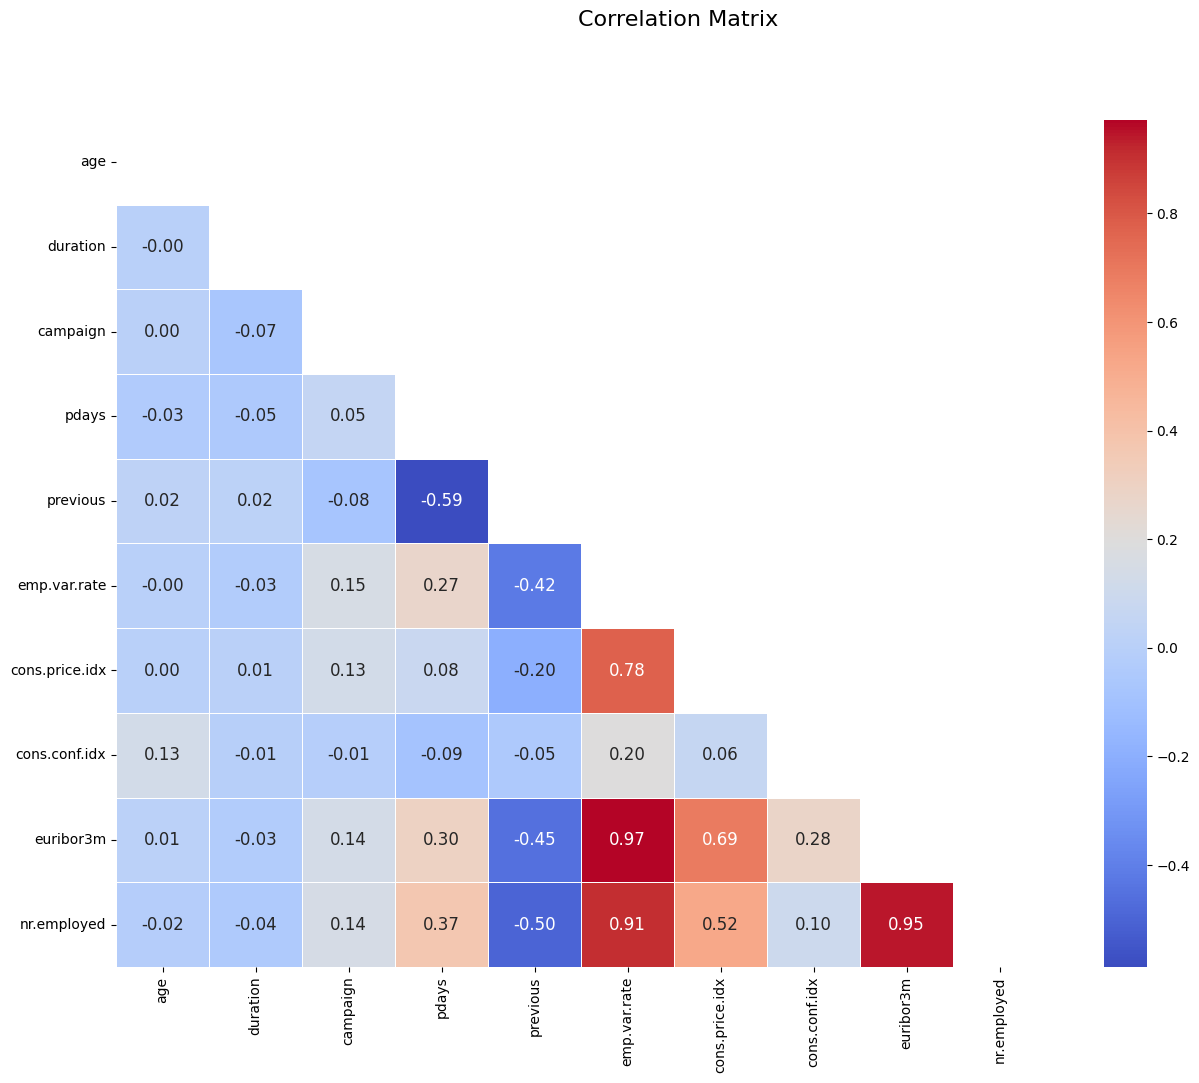

In [25]:
df_corr = df[numerical_columns_list].corr()

mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 11))
sns.heatmap(
    df_corr,
    mask=mask,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 12},
)
plt.suptitle("Correlation Matrix", fontsize=16)
plt.show()

##### Removing Highly Correlated Features
- Remove features with a correlation value (absolute) greater than 0.75.
- Ensure the reliability of the correlation values before proceeding with feature removal.

In [26]:
index_corr_over_75 = np.where((abs(df_corr) > 0.75) & (df_corr != 1))
index_corr_over_75

(array([5, 5, 5, 6, 8, 8, 9, 9], dtype=int64),
 array([6, 8, 9, 5, 5, 9, 5, 8], dtype=int64))

In [27]:
len_corr_over_75 = len(index_corr_over_75[0])
left_columns = df_corr.columns[index_corr_over_75[0]]
right_columns = df_corr.columns[index_corr_over_75[1]]
print("======== Multicollinearity ========")
for index in range(len_corr_over_75):
    print(f"{left_columns[index]} <-> {right_columns[index]}\n")

======== Multicollinearity ========
emp.var.rate <-> cons.price.idx

emp.var.rate <-> euribor3m

emp.var.rate <-> nr.employed

cons.price.idx <-> emp.var.rate

euribor3m <-> emp.var.rate

euribor3m <-> nr.employed

nr.employed <-> emp.var.rate

nr.employed <-> euribor3m



In [28]:
from scipy.stats import pearsonr

#
# 상관계수 계산
correlation_matrix = df.corr()

# 상관계수가 0.9 이상인 경우 확인 및 p-value 검정
high_corr_pairs = []

for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.9:
            # Pearson correlation과 p-value 계산
            corr, p_value = pearsonr(df[col1], df[col2])

            # 결과 저장
            high_corr_pairs.append((col1, col2, corr, p_value))

# 결과 출력
print("Features with correlation > 0.9 and their p-values:")
for col1, col2, corr, p_value in high_corr_pairs:
    print(f"({col1}, {col2}) - Correlation: {corr:.2f}, p-value: {p_value:.3e}")

Features with correlation > 0.9 and their p-values:
(emp.var.rate, euribor3m) - Correlation: 0.97, p-value: 0.000e+00
(emp.var.rate, nr.employed) - Correlation: 0.91, p-value: 0.000e+00
(euribor3m, emp.var.rate) - Correlation: 0.97, p-value: 0.000e+00
(euribor3m, nr.employed) - Correlation: 0.95, p-value: 0.000e+00
(nr.employed, emp.var.rate) - Correlation: 0.91, p-value: 0.000e+00
(nr.employed, euribor3m) - Correlation: 0.95, p-value: 0.000e+00


C:\Users\jongb\AppData\Local\Temp\ipykernel_22232\1361871118.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [29]:
# Null Hypothesis: Variables X and Y are independent.
# Alternative Hypothesis: Variables X and Y are not independent.

list_not_valid = []

# Iterate over pairs with high correlation
for index in range(len_corr_over_75):
    # Calculate Pearson correlation and p-value
    statistic, pvalue = pearsonr(df[left_columns[index]], df[right_columns[index]])

    # Print correlation and p-value
    print(
        f"{left_columns[index]} <-> {right_columns[index]} :\nCorrelation = {statistic:.6f}, p-value = {pvalue:.6f}\n"
    )

    # Check if the p-value exceeds the threshold
    if pvalue > 0.05:
        list_not_valid.append((left_columns[index], right_columns[index]))

# Summary
print("End of analysis.")
print(
    f"{len(list_not_valid)} pairs have p-values greater than 0.05, indicating they are not valid."
)

emp.var.rate <-> cons.price.idx :
Correlation = 0.775293, p-value = 0.000000

emp.var.rate <-> euribor3m :
Correlation = 0.972244, p-value = 0.000000

emp.var.rate <-> nr.employed :
Correlation = 0.906949, p-value = 0.000000

cons.price.idx <-> emp.var.rate :
Correlation = 0.775293, p-value = 0.000000

euribor3m <-> emp.var.rate :
Correlation = 0.972244, p-value = 0.000000

euribor3m <-> nr.employed :
Correlation = 0.945146, p-value = 0.000000

nr.employed <-> emp.var.rate :
Correlation = 0.906949, p-value = 0.000000

nr.employed <-> euribor3m :
Correlation = 0.945146, p-value = 0.000000

End of analysis.
0 pairs have p-values greater than 0.05, indicating they are not valid.


In [30]:
list_not_valid = []

for index in range(len_corr_over_75):
    statistic, pvalue = stats.pearsonr(
        df.loc[:, left_columns[index]], df.loc[:, right_columns[index]]
    )
    print(
        "%s<->%s : %f %f"
        % (left_columns[index], right_columns[index], statistic, pvalue)
    )
    if pvalue > 0.05:
        list_not_valid.append(column_name)
print("end")
print(len(list_not_valid), " is not valids")

emp.var.rate<->cons.price.idx : 0.775293 0.000000
emp.var.rate<->euribor3m : 0.972244 0.000000
emp.var.rate<->nr.employed : 0.906949 0.000000
cons.price.idx<->emp.var.rate : 0.775293 0.000000
euribor3m<->emp.var.rate : 0.972244 0.000000
euribor3m<->nr.employed : 0.945146 0.000000
nr.employed<->emp.var.rate : 0.906949 0.000000
nr.employed<->euribor3m : 0.945146 0.000000
end
0  is not valids


In [31]:
list_removed_by_correlation = ["emp.var.rate", "euribor3m"]

##### VIF Analysis
-  Generally, a value above 10 is considered indicative of multicollinearity.  
- Perform an additional check before removing highly correlated columns (double-check; optional based on personal judgment).

In [32]:
"""
# caculate_vif function
#### to do ####
def caculate_vif(df_target):
  vif = pd.DataFrame()
  vif["VIF_Factor"] = [variance_inflation_factor(df_target.values, i) for i in range(df_target.shape[1])]
  vif["Feature"] = df_target.columns
  return vif

df_vif = df[numerical_columns_list].copy()

caculate_vif(df_vif)
caculate_vif(df_vif.drop("emp.var.rate", axis=1))
"""

'\n# caculate_vif function\n#### to do ####\ndef caculate_vif(df_target):\n  vif = pd.DataFrame()\n  vif["VIF_Factor"] = [variance_inflation_factor(df_target.values, i) for i in range(df_target.shape[1])]\n  vif["Feature"] = df_target.columns\n  return vif\n\ndf_vif = df[numerical_columns_list].copy()\n\ncaculate_vif(df_vif)\ncaculate_vif(df_vif.drop("emp.var.rate", axis=1))\n'

##### Target Column과 numeric Column 관계 분포 확인

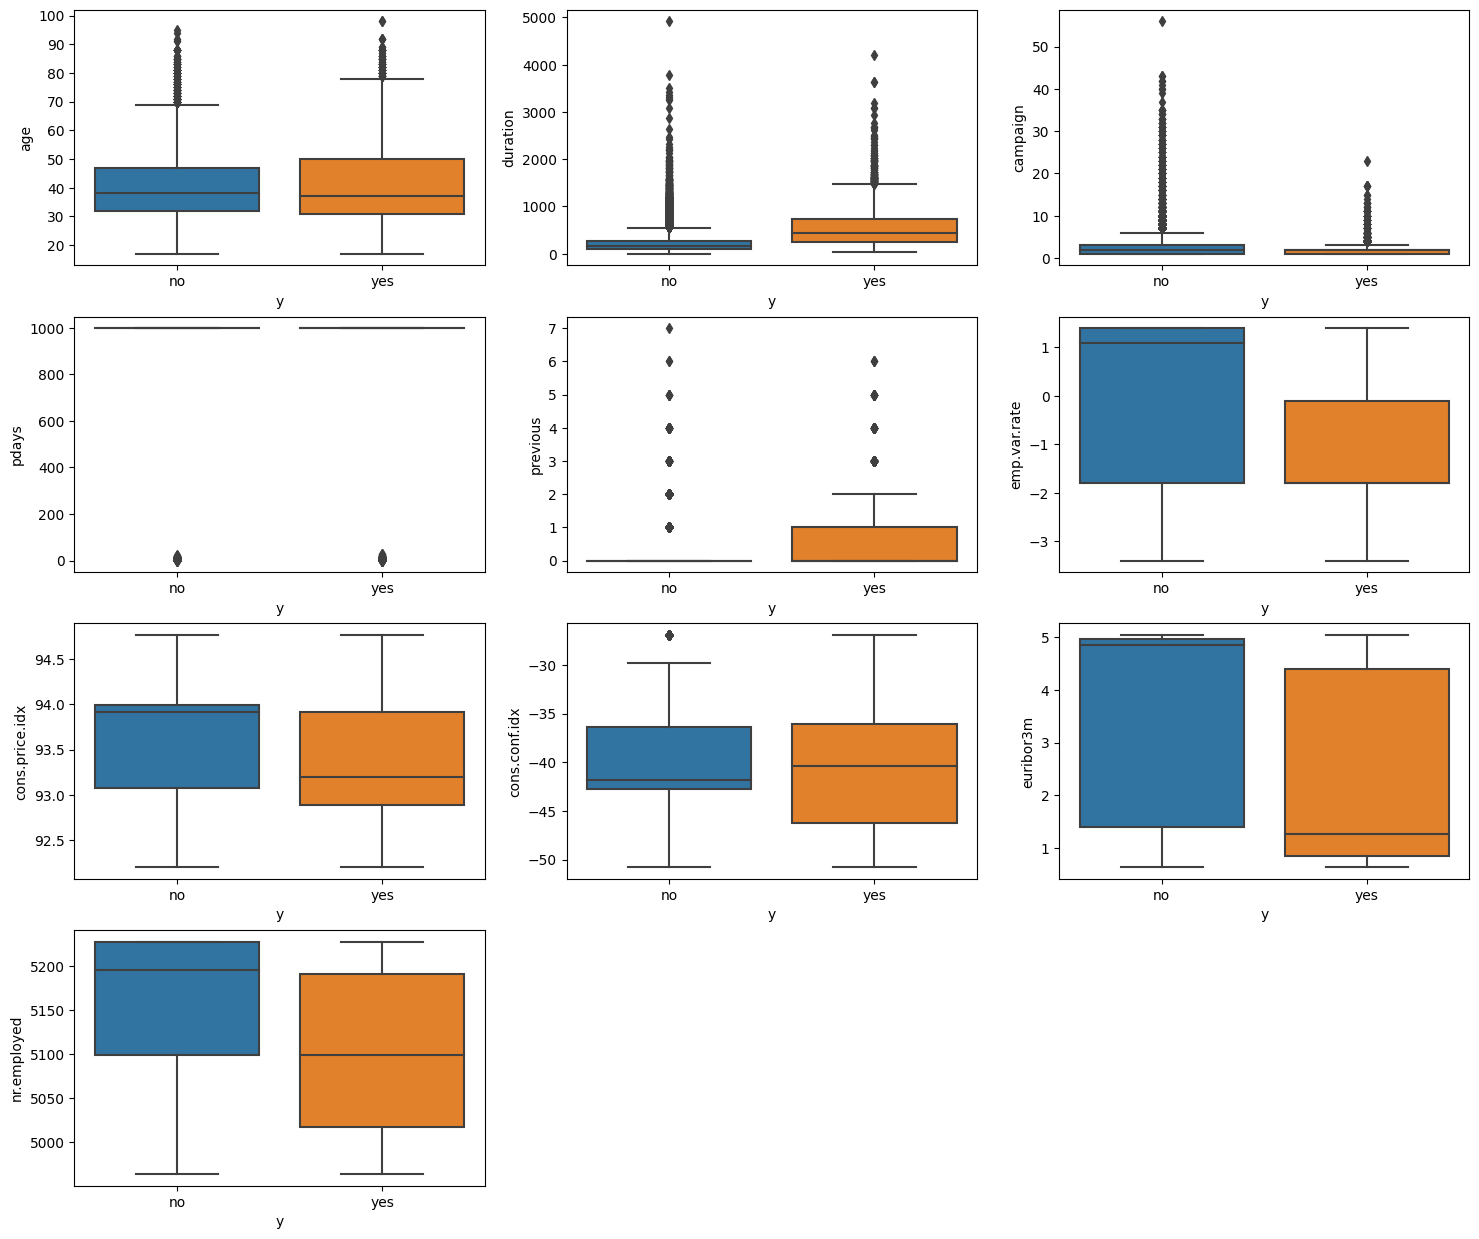

In [33]:
plt.figure(figsize=(18, 12))
x = 1
plt.subplots_adjust(top=0.99, bottom=0.01, hspace=0.2, wspace=0.2)
for column_name in numerical_columns_list:
    plt.subplot(4, 3, x)
    x = x + 1
    sns.boxplot(data=df, x=target_column, y=column_name)
plt.show()

##### ANOVA
*   Tests the difference in distributions of numeric data across categories.  
*   Assumptions: Normality, homogeneity of variance, and independence (the test is not reliable if these assumptions are violated).  
*   In this analysis, the relationship between the target variable `y` and the numeric column data distributions is tested.  
*   A p-value less than or equal to 0.05 is generally considered significant, leading to the rejection of the null hypothesis. (The threshold for p-value can vary, but 0.05 is commonly used).  

#### Normality Test
*   **Null Hypothesis**: The population follows a normal distribution.  
*   **Methods**: Q-Q Plot, Shapiro-Wilk Test.  
*   If p-value < 0.05, the null hypothesis is rejected (normality is satisfied if the null hypothesis cannot be rejected).  

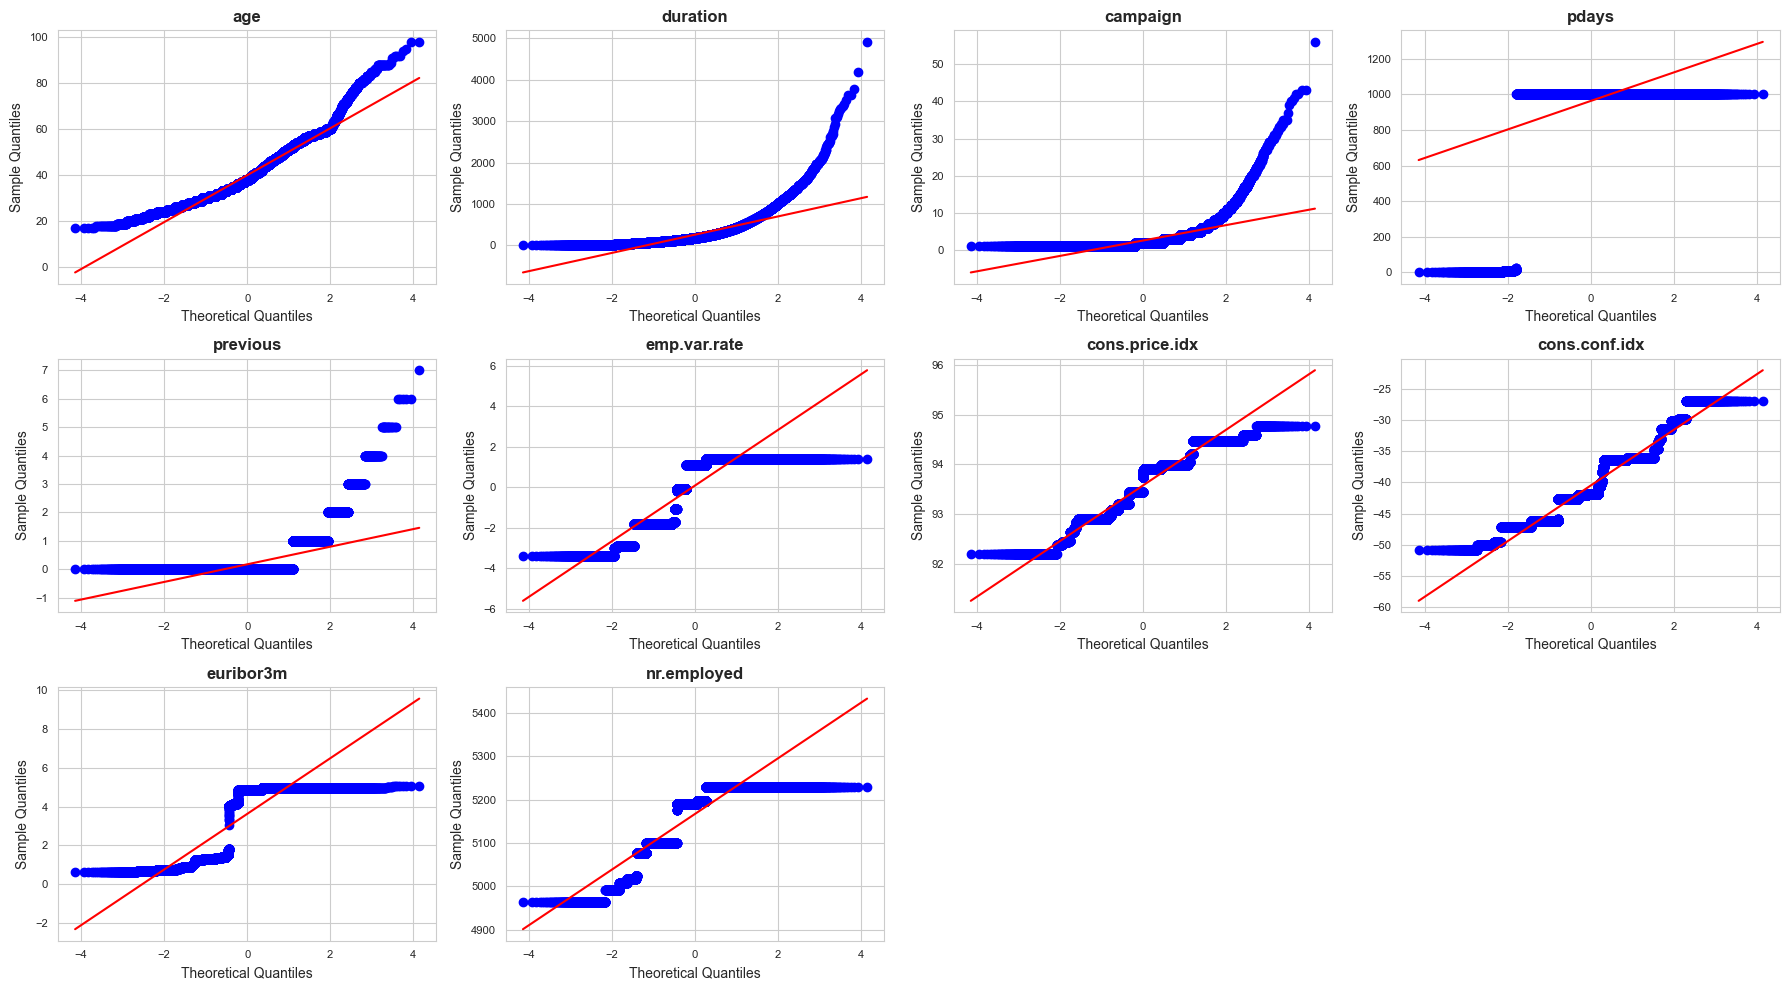

In [34]:
# Check Q-Q plot
sns.set_style("whitegrid")

plt.figure(figsize=(18, 10))
plt.subplots_adjust(top=0.95, bottom=0.05, hspace=0.4, wspace=0.3)

for i, column_name in enumerate(numerical_columns_list, 1):
    plt.subplot(3, 4, i)

    stats.probplot(df[column_name], dist=stats.norm, plot=plt)

    plt.title(f"{column_name}", fontsize=12, fontweight="bold")
    plt.xlabel("Theoretical Quantiles", fontsize=10)
    plt.ylabel("Sample Quantiles", fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

In [35]:
# Shapiro-Wilk Test

list_column_normality = []
for column_name in numerical_columns_list:
    statistic, pvalue = stats.shapiro(df[column_name])
    if pvalue > 0.05:
        list_column_normality.append(column_name)
    print(f"{column_name}\nstatistic:{statistic: .4f} pvalue:{pvalue: .4f}\n")
print("The number of significant column : ", len(list_column_normality))

age
statistic: 0.9573 pvalue: 0.0000

duration
statistic: 0.7217 pvalue: 0.0000

campaign
statistic: 0.5579 pvalue: 0.0000

pdays
statistic: 0.1830 pvalue: 0.0000

previous
statistic: 0.3913 pvalue: 0.0000

emp.var.rate
statistic: 0.7622 pvalue: 0.0000

cons.price.idx
statistic: 0.9339 pvalue: 0.0000

cons.conf.idx
statistic: 0.9239 pvalue: 0.0000

euribor3m
statistic: 0.6863 pvalue: 0.0000

nr.employed
statistic: 0.7878 pvalue: 0.0000

The number of significant column :  0


c:\Users\jongb\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### Result
##### Normality Not Satisfied
*   Since normality is not satisfied, homogeneity of variance testing is not required (as homogeneity assumes normality).  
*   Numeric data analysis using one-way ANOVA is not applicable.  

##### Kruskall-Wallis test (Non-Parametric Test)
- The reliability of non-parametric tests like the Kruskal-Wallis test depends on the data. 
- If the data strongly violates the assumptions of parametric tests, non-parametric tests may be more reliable. 
- Conversely, if the assumptions hold, parametric tests may yield more precise and informative results.

In [36]:
list_meaningful_column_by_kruskall = []

list_target_unique = df[target_column].unique()

for column_name in numerical_columns_list:
    list_by_target_value = []
    for target_value in list_target_unique:
        df_tmp = df[df[target_column] == target_value][column_name].dropna()
        list_by_target_value.append(np.array(df_tmp))
    statistic, pvalue = kruskal(*list_by_target_value)
    if pvalue <= 0.05:
        list_meaningful_column_by_kruskall.append(column_name)
    print(f"{column_name}\nstatistic:{statistic: .4f} pvalue:{pvalue: .4f}\n")
print(f"Total number of columns: {len(numerical_columns_list)}\n")
print(
    f"significant columns by kruskall:\nnumber:{len(list_meaningful_column_by_kruskall)}\n{list_meaningful_column_by_kruskall}\n"
)

age
statistic: 5.8432 pvalue: 0.0156

duration
statistic: 5008.9526 pvalue: 0.0000

campaign
statistic: 166.8379 pvalue: 0.0000

pdays
statistic: 4348.4379 pvalue: 0.0000

previous
statistic: 1662.3956 pvalue: 0.0000

emp.var.rate
statistic: 2520.7461 pvalue: 0.0000

cons.price.idx
statistic: 614.0899 pvalue: 0.0000

cons.conf.idx
statistic: 69.6446 pvalue: 0.0000

euribor3m
statistic: 2930.3148 pvalue: 0.0000

nr.employed
statistic: 3318.9556 pvalue: 0.0000

Total number of columns: 10

significant columns by kruskall:
number:10
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']



##### Insight
1. All numerical data have a significant relationship with target `y` (based on the Kruskal-Wallis test).  
2. There are features with very high correlations, and two features ("emp.var.rate" and "euribor3m") are scheduled to be removed. 

## 3. Data Processing 2 

### 3-1 Check Missing Values

In [37]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### 3-2 Feature Selection
*   Select categorical features that passed the Chi-Square test.  
*   Select numerical features that passed the Kruskal-Wallis test.  
*   Remove numerical features identified as having high correlations.  


In [38]:
list_selected_numerical = list_meaningful_column_by_kruskall.copy()

for column_name in list_removed_by_correlation:
    list_selected_numerical.remove(column_name)

In [39]:
df_fs = df[list_significant_column_by_chi + list_selected_numerical + [target_column]]
df_fs.head(2)

,job,marital,education,default,contact,month,day_of_week,poutcome,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,y
0,housemaid,married,basic.4y,no,telephone,may,mon,nonexistent,56,261,1,999,0,93.994,-36.4,5191.0,no
1,services,married,high.school,unknown,telephone,may,mon,nonexistent,57,149,1,999,0,93.994,-36.4,5191.0,no


### 3-3 Feature Transformation

In [40]:
Y = df_fs[target_column]
X = df_fs.drop([target_column], axis=1)

##### Label Encoding

In [39]:
Y

0         no
1         no
2         no
3         no
4         no
        ... 
41171    yes
41172     no
41173     no
41174    yes
41175     no
Name: y, Length: 41176, dtype: object

In [41]:
le = LabelEncoder()
le.fit(Y)
Y_encoded = le.transform(Y)

In [42]:
Y_encoded

array([0, 0, 0, ..., 0, 1, 0])

In [43]:
le.inverse_transform(Y_encoded)

array(['no', 'no', 'no', ..., 'no', 'yes', 'no'], dtype=object)

##### Feature Scaling

In [44]:
categorical_columns_list = list(df_fs.select_dtypes(include=["object"]).columns)
numerical_columns_list = list(df_fs.select_dtypes(include=["float64", "int64"]).columns)
print(len(categorical_columns_list))
print(len(numerical_columns_list))

9
8


In [45]:
df_fs.head()

,job,marital,education,default,contact,month,day_of_week,poutcome,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,y
0,housemaid,married,basic.4y,no,telephone,may,mon,nonexistent,56,261,1,999,0,93.994,-36.4,5191.0,no
1,services,married,high.school,unknown,telephone,may,mon,nonexistent,57,149,1,999,0,93.994,-36.4,5191.0,no
2,services,married,high.school,no,telephone,may,mon,nonexistent,37,226,1,999,0,93.994,-36.4,5191.0,no
3,admin.,married,basic.6y,no,telephone,may,mon,nonexistent,40,151,1,999,0,93.994,-36.4,5191.0,no
4,services,married,high.school,no,telephone,may,mon,nonexistent,56,307,1,999,0,93.994,-36.4,5191.0,no


In [46]:
scaler = MinMaxScaler()
X.loc[:, numerical_columns_list] = scaler.fit_transform(X[numerical_columns_list])
X.head(1)

,job,marital,education,default,contact,month,day_of_week,poutcome,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed
0,housemaid,married,basic.4y,no,telephone,may,mon,nonexistent,0.481481,0.05307,0.0,1.0,0.0,0.698753,0.60251,0.859735


##### One-hot Encoding for categorical column data

In [47]:
X_base = pd.get_dummies(X)
X_base.head(1)

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,job_admin.,job_blue-collar,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.481481,0.05307,0.0,1.0,0.0,0.698753,0.60251,0.859735,0,0,...,0,0,0,1,0,0,0,0,1,0
